In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('../results/psnr.csv')

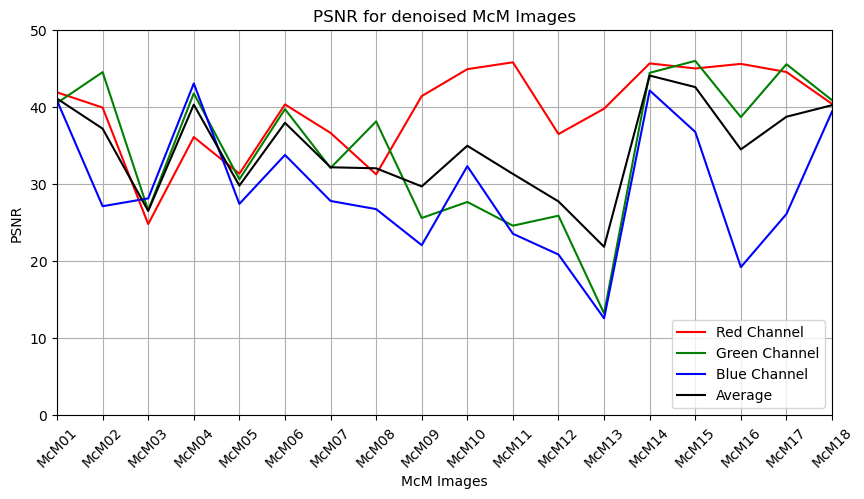

<Figure size 640x480 with 0 Axes>

In [3]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df['r'], color='red', label='Red Channel')
ax.plot(df['g'], color='green', label='Green Channel')
ax.plot(df['b'], color='blue', label='Blue Channel')
ax.plot(df['rgb'], color='black', label='Average')

ax.set(ylim=(0, 50), ylabel='PSNR')
ax.set(xlim=(0, 17), xlabel='McM Images')
ax.set_xticks(df['image'].index, df['image'].values)
ax.set_title('PSNR for denoised McM Images')
ax.tick_params(axis='x', rotation=45)

ax.grid()
ax.legend(loc='lower right')
plt.show()
plt.savefig('../results/psnr.png')

In [4]:
from scipy import fft
from h5py import File
import os
import csv
from ImgProcess import *

RGBs = ['r', 'g', 'b']

In [28]:
fileName = 'McM04'

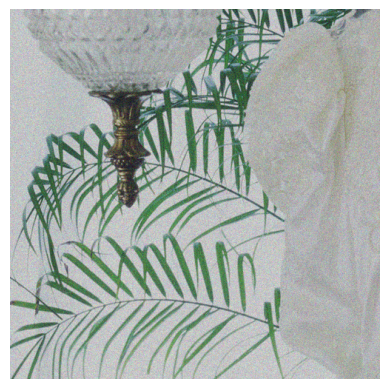

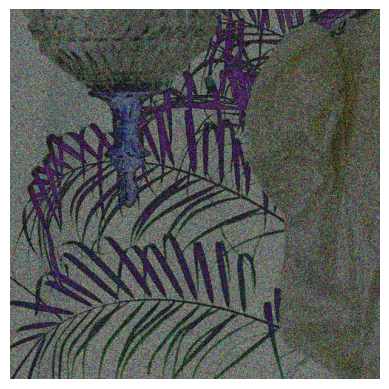

In [29]:
img_clear = plt.imread('../Images/McM images/' + fileName + '.tif') / 255
img_noisy = File('../Images/McM images/' + fileName + '_noise.mat')
img_noisy = [_.T for _ in img_noisy['u_n']]
img_denoised = plt.imread('../results/images denoised/' + fileName + '.png')[:, :, :3]

plt.imsave('../tmp/' + fileName + '.png', img_clear)
plt.imsave('../tmp/' + fileName + '_denoised.png', img_denoised)

img_noisy = Show(*img_noisy, cmap='rgb')
plt.imsave('../tmp/' + fileName + '_noisy.png', img_noisy)

noise = np.abs(img_noisy - img_clear)
plt.imsave('../tmp/' + fileName + '_noise.png', noise)

noise2_ = np.abs(img_noisy - img_denoised)
noise2 = []

for i in range(3):
    noise2.append(noise2_[:, :, i] / np.max(noise2_[:, :, i]))

noise2 = Show(*noise2, cmap='rgb')
plt.imsave('../tmp/' + fileName + '_noise2.png', noise2)